In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [2]:
def E_func(xa,xb,n,x):
    if n==0 or xb-xa<=0:
        return print("Check parameters. 0 Should not be included and xb>xa is required.")
    else:
        L = np.abs(xb-xa)
        xcenter = (xb+xa)/2
        return np.sqrt(2/L)*np.sin(n*np.pi/L*(x-xcenter+L/2))
    
def scalar(xa,xb,f1,f2):
    scal, err = integrate.quad(lambda x: np.conj(f1(x))*f2(x),xa,xb)
    return scal, err

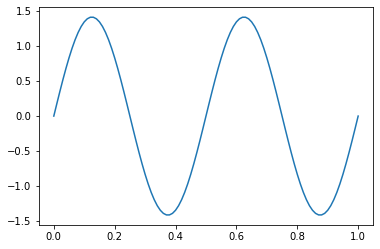

In [3]:
plt.plot(np.linspace(0,1,101),E_func(0,1,4,np.linspace(0,1,101)))

### Build pauli matrices

In [52]:
sigmax = np.array([[0,1],[1,0]])
sigmay = np.array([[0,-1j],[1j,0]])
sigmaz = np.array([[1,0],[0,-1]])

### Construction of H_0

In [46]:
def eval0(L,mass,n):
    return n**2*np.pi**2/(2*mass*L**2)

In [47]:
def H0(size): 
    return np.kron(np.diag(np.array([eval0(1,1,k+1) for k in range(0,size)])),np.eye(2))

### Build the matrix BB necessary to specify the interaction.

In [49]:
def B(x):
    return (x-0.5)**2

In [6]:
def BB(n,m):
    a = n
    b = m
    return scalar(x0,x1,lambda x: E_func(x0,x1,a,x),lambda x: E_func(x0,x1,b,x)*B(x))[0]  

In [56]:
def BMAT(size):
    B_MAT = np.zeros((size,size))
    for k in range(size):
        for n in range(size):
            B_MAT[k,n] = BB(k+1,n+1)
    return B_MAT

In [80]:
def HTOT(size):
    return H0(size) + 10*np.kron(BMAT(size),sigmax+sigmay)

In [81]:
eig_val, eig_vec = np.linalg.eigh(HTOT(20))

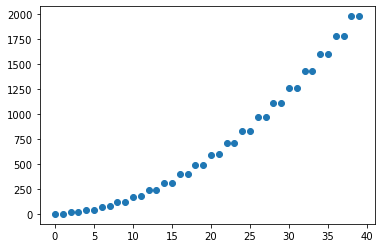

In [82]:
plt.plot(eig_val,'o')

In [83]:
eig_vec.shape

(40, 40)